In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import os
from keras.layers import concatenate
from sklearn.model_selection import train_test_split


In [3]:
(train_images, train_labels), (val_images, val_labels) = datasets.cifar10.load_data()
val_images,test_images,val_labels,test_labels = train_test_split(val_images,val_labels,test_size=0.10)


In [5]:
# Tune parameters
epochs= 30
learning_rate = 1e-4

# Model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

#CNN
input = layers.Input(shape=(32, 32, 3))

layer = layers.Conv2D(32,(5,5),padding='same',activation='relu')(input)
layer = layers.MaxPooling2D(pool_size=(2,2))(layer)

layer = layers.Conv2D(64,(3,3),padding='same',activation='relu')(layer)
layer = layers.MaxPooling2D(pool_size=(2,2))(layer)
xr = layer

layer = layers.Conv2D(64,(3,3),padding='same',activation='relu')(layer)
layer = layers.MaxPooling2D(pool_size=(2,2))(layer)

layer = layers.Conv2D(128,(3,3),padding='same',activation='relu')(layer)
layer = layers.BatchNormalization()(layer)
layer = layers.MaxPooling2D(pool_size=(2,2))(layer)
layer = layers.Dropout(0.5)(layer)

#Inception Block

#block11 = layers.Conv2D(64, (1,1), activation='relu', padding='same')(x)
#block11 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(block11)
#block11 = layers.Dropout(0.5)(block11)

#block12 = layers.MaxPooling2D((3,3), strides = (1,1), padding='same')(x)
#block12 = layers.Conv2D(64, (1,1), activation='relu', padding='same')(block12)
#block12 = layers.Dropout(0.5)(block12)

#block1 = concatenate([block11, block12], axis=3)
#block1 = layers.BatchNormalization()(block1)
#output = Flatten()(block1)


#Residual block

#layer = layers.Conv2D(64,(3,3),padding='same',activation='relu')(layer)
#layer = layers.BatchNormalization()(layer)

#layer = layers.Dropout(0.5)(layer)

#layer = layers.Conv2D(64,(3,3),padding='same',activation='relu')(layer)
#layer = layers.BatchNormalization()(layer)

#layer = layers.Dropout(0.5)(layer)
#layer = layers.add([layer,xr])


output = Flatten()(layer)

out = Dense(10,activation='softmax')(output)

model = models.Model(inputs = input,outputs = out)
model.summary()

model.compile(optimizer = optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    validation_data=(val_images, val_labels))


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 17s 5ms/step - loss: 2.3514 - accuracy: 0.2858 - val_loss: 1.5040 - val_accuracy: 0.4531
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7192 - accuracy: 0.4159 - val_loss: 1.3774 - val_accuracy: 0.5104
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4853 - accuracy: 0.4850 - val_loss: 1.3175 - val_accuracy: 0.5360
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3161 - accuracy: 0.5392 - val_loss: 1.1706 - val_accuracy: 0.5838
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1906 - accuracy: 0.5863 - val_loss: 1.0701 - val_accuracy: 0.6252


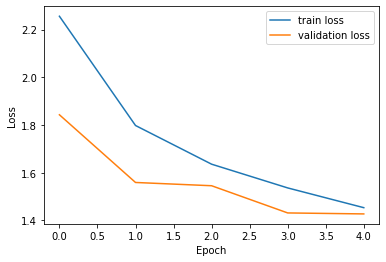

In [ ]:
#Plot Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

79/79 - 2s - loss: 1.4325 - accuracy: 0.4940 - 2s/epoch - 21ms/step
Test accuracy:  0.49399998784065247


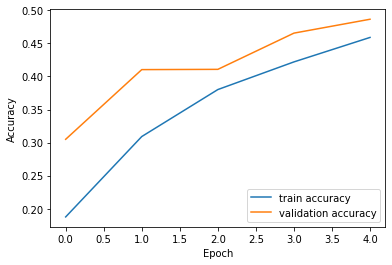

In [ ]:
#Plot Accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Test evaluation
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy: ',test_acc)